# Visualizing Geographical Data
Using airline data from http://openflights.org/data.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
# airports.dat file does not have headers so add custom header
columns=['id','name','city','country','code','icao','latitude','longitude','altitude','offset','dst','timezone']
airports = pd.read_csv('airports.dat', names=columns)
print airports.columns
print airports.head(5)

Index([u'id', u'name', u'city', u'country', u'code', u'icao', u'latitude',
       u'longitude', u'altitude', u'offset', u'dst', u'timezone'],
      dtype='object')
   id                        name          city           country code  icao  \
0   1                      Goroka        Goroka  Papua New Guinea  GKA  AYGA   
1   2                      Madang        Madang  Papua New Guinea  MAG  AYMD   
2   3                 Mount Hagen   Mount Hagen  Papua New Guinea  HGU  AYMH   
3   4                      Nadzab        Nadzab  Papua New Guinea  LAE  AYNZ   
4   5  Port Moresby Jacksons Intl  Port Moresby  Papua New Guinea  POM  AYPY   

   latitude   longitude  altitude  offset dst              timezone  
0 -6.081689  145.391881      5282    10.0   U  Pacific/Port_Moresby  
1 -5.207083  145.788700        20    10.0   U  Pacific/Port_Moresby  
2 -5.826789  144.295861      5388    10.0   U  Pacific/Port_Moresby  
3 -6.569828  146.726242       239    10.0   U  Pacific/Port_Moresby  
4 -9.

In [3]:
# same for airlines.dat
columns=['id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active']
airlines = pd.read_csv('airlines.dat', names=columns)
print airlines.head(5)

   id                                          name alias iata icao callsign  \
0   1                                Private flight    \N    -  NaN      NaN   
1   2                                   135 Airways    \N  NaN  GNL  GENERAL   
2   3                                 1Time Airline    \N   1T  RNX  NEXTIME   
3   4  2 Sqn No 1 Elementary Flying Training School    \N  NaN  WYT      NaN   
4   5                               213 Flight Unit    \N  NaN  TFU      NaN   

          country active  
0             NaN      Y  
1   United States      N  
2    South Africa      Y  
3  United Kingdom      N  
4          Russia      N  


In [4]:
columns=['airline', 'airline_id', 'source', 'source_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment']
routes = pd.read_csv('routes.dat', names=columns)
print routes.head(5)

  airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN      0       CR2
2      2B        410    ASF      2966  MRV    2962       NaN      0       CR2
3      2B        410    CEK      2968  KZN    2990       NaN      0       CR2
4      2B        410    CEK      2968  OVB    4078       NaN      0       CR2


# Coordinate system

Latitude values :  
    - describe the North-South position  
    - degrees as the unit  
    - ranges from -90 to 90 degrees  

Longitude values :
    - describe the East-West position
    - degrees as the unit
    - ranges from -180 to 180 degrees

**Toolkit Basemap converts the spherical coordinates onto a 2d x,y cartesian system**

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

/Users/HyunJooHwang/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Basemap class takes these arguments:
- projection : map projection type
- llcrnrlat : 'lower left corner' latitude limit (degrees)
- urcrnrlat : 'upper right corner'latitude limit
- llcrnrlon : 'llcrnr' longitude limit
- urcrnrlon : 'urcrnr' longitude limit

In [6]:
# crease a basemap instance
m=Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)

longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

# Convert latitude and longitude to x and y coordinates using the basemap instance
x, y = m(longitudes, latitudes)

# Display original longitude values
print(longitudes[0:5])
# Display original latitude values
print(latitudes[0:5])
# Display x-axis coordinates
print(x[0:5])
# Display y-axis coordinates
print(y[0:5])

[145.39188100000001, 145.78870000000001, 144.295861, 146.72624199999998, 147.22004999999999]
[-6.0816889999999999, -5.2070829999999999, -5.8267889999999998, -6.5698280000000002, -9.4433830000000007]
[36181909.301050939, 36226033.539869711, 36060037.494937442, 36330283.404696316, 36385192.323177092]
[14843790.192364652, 14941516.685597016, 14872287.53105044, 14789178.970192088, 14466473.840393927]


## Visualizing data

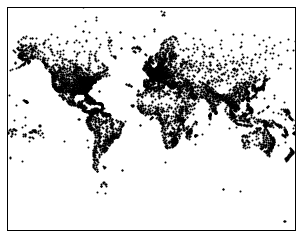

In [7]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m.scatter(x,y, s=1)
plt.show()

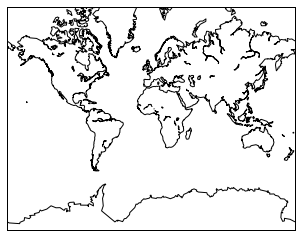

In [8]:
# Coastline method
m.drawcoastlines()
plt.show()

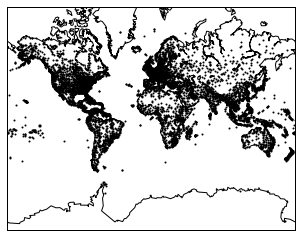

In [9]:
m.scatter(x,y, s=1)
m.drawcoastlines()
plt.show()

# Routes data

**AND cleaning up data**
- merge method

In [10]:
# I need to add longitude and latitude values to the geographical routes we currently have
print airports.columns
print routes.columns

# Make a new data frame containing the airport code and the respective location
code_src = airports[['code','latitude','longitude']]
# rename appropriately. need one common column name to merge
code_src.columns = ['source','latitude_src','longitude_src']
print code_src.head(5)

# do the same for the destination airport
code_dest = airports[['code','latitude','longitude']]
code_dest.columns = ['dest','latitude_dest','longitude_dest']

# merge based on the source and destination airport codes
routes = routes.merge(code_src, on='source')
routes = routes.merge(code_dest, on='dest')
print routes.head(5)

Index([u'id', u'name', u'city', u'country', u'code', u'icao', u'latitude',
       u'longitude', u'altitude', u'offset', u'dst', u'timezone'],
      dtype='object')
Index([u'airline', u'airline_id', u'source', u'source_id', u'dest', u'dest_id',
       u'codeshare', u'stops', u'equipment'],
      dtype='object')
  source  latitude_src  longitude_src
0    GKA     -6.081689     145.391881
1    MAG     -5.207083     145.788700
2    HGU     -5.826789     144.295861
3    LAE     -6.569828     146.726242
4    POM     -9.443383     147.220050
  airline airline_id source source_id dest dest_id codeshare  stops equipment  \
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2   
1      2B        410    ASF      2966  KZN    2990       NaN      0       CR2   
2      2B        410    CEK      2968  KZN    2990       NaN      0       CR2   
3      2B        410    DME      4029  KZN    2990       NaN      0       CR2   
4      S7       4329    DME      4029  KZN    2990     

## Using Greatcircle to visualize routes

Basemap method drawgreatcircle() takes 4 arguments:
- lon1 - longitude of the starting point.
- lat1 - latitude of the starting point.
- lon2 - longitude of the ending point.
- lat2 - latitude of the ending point.

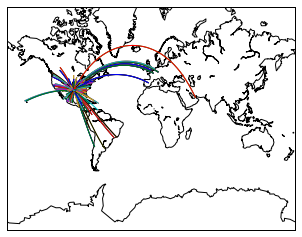

In [13]:
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        start_lon = row['longitude_src']
        start_lat = row['latitude_src']
        end_lon = row['longitude_dest']
        end_lat = row['latitude_dest']

        if abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon) < 180:
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=1)
            
dfw = routes[routes['source']=='DFW']
create_great_circles(dfw)
plt.show()